In [1]:
from utils_data import load_data,scale_props,get_graphs
from utils_plotting import plot_property_histograms
from sklearn.model_selection import train_test_split
from utils_model import train_and_validate_multi,get_preds_per_task,vals_to_df
from torch_geometric.loader import DataLoader
from torch_geometric.nn.models import AttentiveFP
import torch
import pandas as pd

In [3]:
#with the changes to the code, calc the stats might not be going right, maybe use this instead:
def print_stats(ys,preds,prop):
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = mean_squared_error(ys,preds,squared=False)
    r2_vp = r2_score(ys,preds)
    print('RMSE',prop,':',rmse)
    print('R2',prop,':',r2_vp)


def print_rmse_and_r2_unscaled(preds,ys):
    preds_vp = preds[0]
    preds_p = preds[1]
    ys_vp = ys[0]
    ys_p = ys[1]
    preds_vp =[p for p in preds_vp if p != -1]
    preds_p =[p for p in preds_p if p != -1]
    ys_vp =[p for p in ys_vp if p != -1]
    ys_p =[p for p in ys_p if p != -1]
    print_stats(ys_vp,preds_vp,'LogVP')
    print_stats(ys_p,preds_p,'LogP')


def print_rmse_and_r2_scaled(df_preds,df_ys):
    preds_vp = df_preds['LogVP'].dropna().values
    preds_p = df_preds['LogP'].dropna().values
    ys_vp = df_ys['LogVP'].dropna().values
    ys_p = df_ys['LogP'].dropna().values
    print_stats(ys_vp,preds_vp,'LogVP')
    print_stats(ys_p,preds_p,'LogP')

In [2]:
train = pd.read_csv("train.csv")
train_graphs_DASH_charge_scaled = get_graphs(train,dash_charges=True,scaled =True,save_graphs = True)

Loading previously created graphs


In [4]:
outputs = 14 #keep this at 14 for now, this is all the properties for which graphs are made
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:',device)
train_data, val_data = train_test_split(train_graphs_DASH_charge_scaled, test_size=0.2, random_state=2000)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
model= AttentiveFP(in_channels=24, hidden_channels=200, out_channels=outputs, #note that using the DASH graphs will increase the amount of node feauters (input channels for model) from 23 to 24
                            edge_dim=11, num_layers=4, num_timesteps=2,
                            dropout=0.0).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=10**-3,
                        weight_decay=10**-4)
print(len(train_data), len(val_data))
train_and_validate_multi(model, train_loader, val_loader, optimizer, num_epochs=100, outputs=outputs, verbose=True,props_to_train=['LogP'],name='test_DASH_scaled_onlyLogP')

Device: cuda
14686 3672


/localhome/cschiebroek/.conda/envs/mtl_dc/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/100: Train Loss: 0.1229, Val Loss: 0.0669
Epoch 2/100: Train Loss: 0.0637, Val Loss: 0.0619
Epoch 3/100: Train Loss: 0.0589, Val Loss: 0.0628
Epoch 4/100: Train Loss: 0.0573, Val Loss: 0.0541
Epoch 5/100: Train Loss: 0.0538, Val Loss: 0.0592
Epoch 6/100: Train Loss: 0.0542, Val Loss: 0.0601
Epoch 7/100: Train Loss: 0.0541, Val Loss: 0.0514
Epoch 8/100: Train Loss: 0.0545, Val Loss: 0.0593
Epoch 9/100: Train Loss: 0.0536, Val Loss: 0.0510
Epoch 10/100: Train Loss: 0.0526, Val Loss: 0.0533
Epoch 11/100: Train Loss: 0.0525, Val Loss: 0.0553
Epoch 12/100: Train Loss: 0.0517, Val Loss: 0.0504
Epoch 13/100: Train Loss: 0.0509, Val Loss: 0.0513
Epoch 14/100: Train Loss: 0.0518, Val Loss: 0.0532
Epoch 15/100: Train Loss: 0.0505, Val Loss: 0.0491
Epoch 16/100: Train Loss: 0.0497, Val Loss: 0.0519
Epoch 17/100: Train Loss: 0.0518, Val Loss: 0.0499
Epoch 18/100: Train Loss: 0.0502, Val Loss: 0.0529
Epoch 19/100: Train Loss: 0.0500, Val Loss: 0.0533
Epoch 20/100: Train Loss: 0.0497, Val Lo

KeyboardInterrupt: 

2183
0.7759479692685327
-----------------------------------
Property: LogP
kendall_tau: 0.7326100985045726
rmse_overall: 0.7759479692685327
mae_overall: 0.5755817936813057
within_03_overall: 0.3605130554283097
within_1_overall: 0.841960604672469
R2: 0.8264319142815932
Pearson: 0.9097196018054309


/localhome/cschiebroek/.conda/envs/mtl_dc/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/localhome/cschiebroek/.conda/envs/mtl_dc/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/localhome/cschiebroek/.conda/envs/mtl_dc/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecate

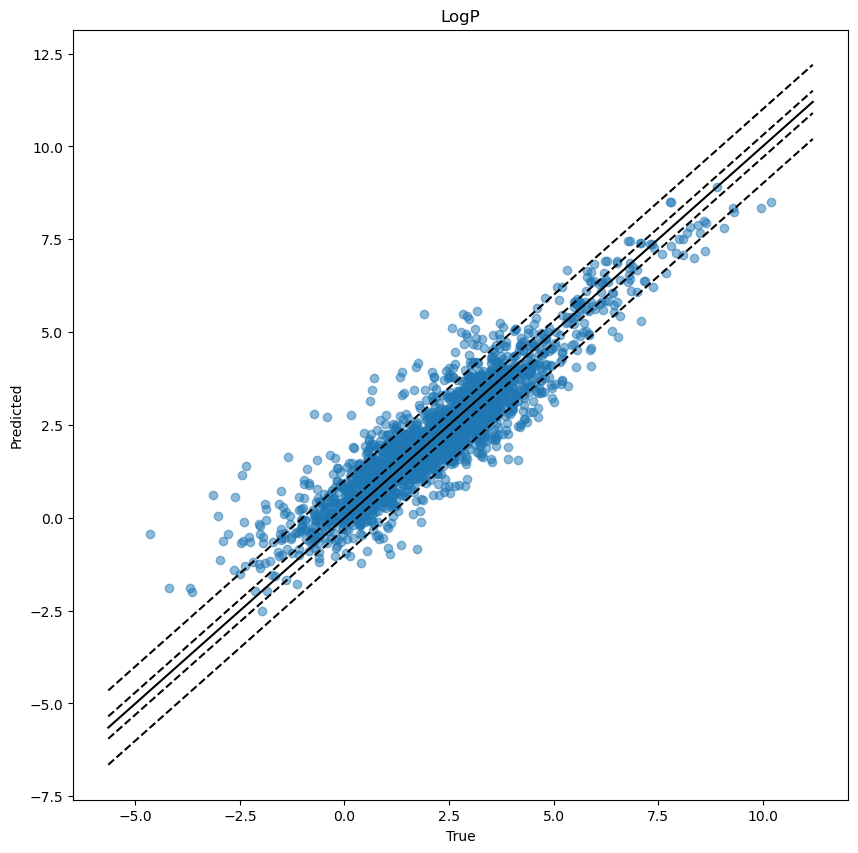

In [7]:
model= AttentiveFP(in_channels=24, hidden_channels=200, out_channels=outputs, #note that using the DASH graphs will increase the amount of node feauters (input channels for model) from 23 to 24
                            edge_dim=11, num_layers=4, num_timesteps=2,
                            dropout=0.0).to(device)
model.load_state_dict(torch.load('test_DASH_scaled_onlyLogP.pt'))
preds, ys = get_preds_per_task(model,val_loader, outputs,props_to_predict=['LogP'])
df_preds = vals_to_df(preds,props_to_predict=['LogP'])
df_ys = vals_to_df(ys,props_to_predict=['LogP'])
ps_pred = df_preds['LogP'].dropna().values
ps = df_ys['LogP'].dropna().values
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ps_pred,ps,squared=False))
#plot
from utils_plotting import plot_scatters
print('-----------------------------------')
plot_scatters(df_preds,df_ys)


In [2]:
#lets actually also do it the "normal" way
#basics
import os
from math import sqrt
import pandas
import numpy as np
import random


#torch stuff
import torch
from torch.nn import functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.nn.utils import clip_grad_norm_
from torch_geometric.nn.models import AttentiveFP
from torch_geometric.loader import DataLoader



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#set random seeds
torch.manual_seed(0)
torch.cuda.manual_seed(0)
random.seed(0)
np.random.seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)


def train_single_task(train_loader, model, optimizer):
    total_loss  = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        data.y = data.y.view(-1, 1)
        loss = F.mse_loss(out, data.y)
        loss.backward()
        # clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs

    return sqrt(total_loss / total_examples)

def val_single_task(train_loader, model):
    total_loss = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        data.y = data.y.view(-1, 1)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out, data.y)
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs
    return sqrt(total_loss / total_examples)


def train_and_validate_single(model, train_loader, val_loader, optimizer, num_epochs, outputs, verbose=True,name='test'):
    train_losses = []
    val_losses = []
    scheduler = ReduceLROnPlateau(optimizer, patience=2, factor=0.9,verbose=False)

    min_val_los = 10000000
    for epoch in range(num_epochs):
        model.train()
        train_loss = train_single_task(train_loader, model, optimizer)
        train_losses.append(train_loss)

        model.eval()
        val_loss = val_single_task(val_loader, model)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        if val_loss < min_val_los:
            min_val_los = val_loss
            counter = 0
            torch.save(model.state_dict(), f'{name}.pt')

        else:
            counter += 1
        if counter > 10:
            if verbose:
                print('early stopping')
            break
        if verbose:
            print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


In [2]:
train = pd.read_csv("train.csv")

train_graphs_DASH_charge_scaled = get_graphs(train,dash_charges=True,scaled =True,save_graphs = True)
#split 
train_graphs_DASH_charge_scaled_only_logp = []
for g in train_graphs_DASH_charge_scaled:
    g.y = g.y[0][1]
    train_graphs_DASH_charge_scaled_only_logp.append(g)
#print first one
print(train_graphs_DASH_charge_scaled_only_logp[0])

Loading previously created graphs
CustomData(x=[99, 24], edge_index=[2, 196], edge_attr=[196, 11], y=-1.0, batch=[99], molecule_charge=[1], smiles='[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])OC([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]', sdf_idx=0, SMILES='CCCCCCCCCCCCCCCCOCCCCCCCCCCCCCCCC')


In [3]:
#only get the ones that are not -1
train_graphs_DASH_charge_scaled_only_logp = [g for g in train_graphs_DASH_charge_scaled_only_logp if g.y != -1]
print(len(train_graphs_DASH_charge_scaled_only_logp),len(train['LogP'].dropna()),len(train_graphs_DASH_charge_scaled),len(train))

11055 11137 18358 18582


In [4]:
#split
train_data, val_data = train_test_split(train_graphs_DASH_charge_scaled_only_logp, test_size=0.2, random_state=2000)
#not this is kinda stupid because now we are again not looking at the exact same thing. should do this properly with the same validation set
#additionally, should do HP tuning for both models; its quite different so probably need different hp.

In [28]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
model= AttentiveFP(in_channels=24, hidden_channels=200, out_channels=1, #note that using the DASH graphs will increase the amount of node feauters (input channels for model) from 23 to 24
                            edge_dim=11, num_layers=4, num_timesteps=2,
                            dropout=0.0).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=10**-3,
                        weight_decay=10**-4)
print(len(train_data), len(val_data))
train_and_validate_single(model, train_loader, val_loader, optimizer, 100, outputs, verbose=True,name='test_DASH_scaled_onlyLogP_single_task_setup')

8844 2211
Epoch 1/100: Train Loss: 0.1183, Val Loss: 0.0712
Epoch 2/100: Train Loss: 0.0655, Val Loss: 0.0565
Epoch 3/100: Train Loss: 0.0555, Val Loss: 0.0570
Epoch 4/100: Train Loss: 0.0536, Val Loss: 0.0551
Epoch 5/100: Train Loss: 0.0543, Val Loss: 0.0511
Epoch 6/100: Train Loss: 0.0534, Val Loss: 0.0573
Epoch 7/100: Train Loss: 0.0526, Val Loss: 0.0537
Epoch 8/100: Train Loss: 0.0494, Val Loss: 0.0533
Epoch 9/100: Train Loss: 0.0511, Val Loss: 0.0524
Epoch 10/100: Train Loss: 0.0503, Val Loss: 0.0488
Epoch 11/100: Train Loss: 0.0507, Val Loss: 0.0747
Epoch 12/100: Train Loss: 0.0511, Val Loss: 0.0504
Epoch 13/100: Train Loss: 0.0494, Val Loss: 0.0541
Epoch 14/100: Train Loss: 0.0473, Val Loss: 0.0490
Epoch 15/100: Train Loss: 0.0491, Val Loss: 0.0621
Epoch 16/100: Train Loss: 0.0509, Val Loss: 0.0481
Epoch 17/100: Train Loss: 0.0470, Val Loss: 0.0483
Epoch 18/100: Train Loss: 0.0479, Val Loss: 0.0512
Epoch 19/100: Train Loss: 0.0475, Val Loss: 0.0456
Epoch 20/100: Train Loss: 0.04

note the instable validation loss..

In [8]:
def get_preds_single(val_loader, model):
    preds,ys = [],[]
    for data in val_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        preds.extend(out)
        ys.extend(data.y)
        del out
    del data
    preds = [float(p) for p in preds]
    ys = [float(y) for y in ys]         
    print(len(ys))
    
    return preds,ys

In [10]:
#clear cuda memory
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.cuda.memory_summary(device=device, abbreviated=True)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 2            |        cudaMalloc retries: 3         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   3803 MiB |   3803 MiB |  20815 MiB |  17011 MiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   3803 MiB |   3803 MiB |  20815 MiB |  17011 MiB |\n|---------------------------------------------------------------------------|\n| Requested memory      |   3764 MiB |   3764 MiB |  20568 MiB |  16804 MiB |\n|--------------------------------------------------